In [1]:
#Dataset - "cardioVascular Disease dataset"(Kaggle).
#link - kaggle.com/sulianova/cardiovascular-disease-dataset

#this dataset contains characteristics(variables) of individuals who have and do not have the cardiovasualar disease
#I will be performing data analysis(hypothesis testing and logistic regression)to find insights about this dataset.

In [ ]:
#dataset indicators: gener:female=1 male=2
#                   glucose and cholesterol: normal=1 above normal=2 well above normal=3
#                   smoke,alcohol,active,cardio vascualr diseas: 0 = No/negative 1=Yes/positive

In [32]:
install.packages("nortest")

package 'nortest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sanele Sibeko\AppData\Local\Temp\RtmpiodjEP\downloaded_packages


In [2]:
#get and set the working directory
getwd()
rm(list=ls())
setwd("/Users/Sanele Sibeko/Documents/datasets")

[1] "C:/Users/Sanele Sibeko"

In [3]:
#reading the dataset
cardio_dataset = read.csv("cardio_train.csv",header = TRUE,sep=";")
cardio_dataset

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
8,21914,1,151,67,120,80,2,2,0,0,0,0
9,22113,1,157,93,130,80,3,1,0,0,1,0
12,22584,2,178,95,130,90,3,3,0,0,1,1
13,17668,1,158,71,110,70,1,1,0,0,1,0
14,19834,1,164,68,110,60,1,1,0,0,0,0


In [4]:
#looking at a summary of the data. note some of the variables are binary
summary(cardio_dataset)

       id             age            gender         height     
 Min.   :    0   Min.   :10798   Min.   :1.00   Min.   : 55.0  
 1st Qu.:25007   1st Qu.:17664   1st Qu.:1.00   1st Qu.:159.0  
 Median :50002   Median :19703   Median :1.00   Median :165.0  
 Mean   :49972   Mean   :19469   Mean   :1.35   Mean   :164.4  
 3rd Qu.:74889   3rd Qu.:21327   3rd Qu.:2.00   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :2.00   Max.   :250.0  
     weight           ap_hi             ap_lo           cholesterol   
 Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000  
 Median : 72.00   Median :  120.0   Median :   80.00   Median :1.000  
 Mean   : 74.21   Mean   :  128.8   Mean   :   96.63   Mean   :1.367  
 3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000  
 Max.   :200.00   Max.   :16020.0   Max.   :11000.00   Max.   :3.000  
      gluc           smoke              alco           

In [ ]:
#From this summary we can see that with systolic and diastolic blood pressure there are potential extreme outlier problems.
# The mean compared to the maximum and minimum values is very large.

#There are a couple of ways to deal with outliers,one being deleting their entire cases but this is risky and highly,
#unrecommended,however,knowing that a sphygmomanometer which is used to measure blood pressure ranges between 0-300,we can 
#assume that values outside this range are impossible. we will then remove these cases.

In [5]:
#get the information on the strucure of the dataset in a compact form using the str() function
#we can get the class,dimensions and a peek at the dataset.
str(cardio_dataset)


'data.frame':	70000 obs. of  13 variables:
 $ id         : int  0 1 2 3 4 8 9 12 13 14 ...
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : int  2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: int  1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : int  1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ cardio     : int  0 1 1 1 0 0 0 1 0 0 ...


In [10]:
#the categorical variables are read as intergers so they need to be convertered to factors(categorical varaibles)
cardio_dataset$gender = as.factor(cardio_dataset$gender)
cardio_dataset$cholesterol = as.factor(cardio_dataset$cholesterol)
cardio_dataset$gluc = as.factor(cardio_dataset$gluc)
cardio_dataset$smoke = as.factor(cardio_dataset$smoke)
cardio_dataset$alco = as.factor(cardio_dataset$alco)
cardio_dataset$active = as.factor(cardio_dataset$active)
cardio_dataset$cardio = as.factor(cardio_dataset$cardio)
str(cardio_dataset)

'data.frame':	70000 obs. of  13 variables:
 $ id         : int  0 1 2 3 4 8 9 12 13 14 ...
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : Factor w/ 2 levels "1","2": 2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: Factor w/ 3 levels "1","2","3": 1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ alco       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ active     : Factor w/ 2 levels "0","1": 2 2 1 2 1 1 2 2 2 1 ...
 $ cardio     : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 2 1 1 ...


In [11]:
#checking if there are any missing values in the dataset that may cause problems.
# the is.na() funtion will return true if any cell in the dataframe has a missing value, this is not an efficient
#way of checking for missing values(na) because of the size of the dataset
is.na(cardio_dataset)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [12]:
#with a quick eye scan of the data one can see no NA values,however, one could easily miss them.
#lets count how man NA values there are,if there is any. 

#is.na() returns true(1) for missing values then sum() will sum up the number of NA values.A zero will indicate no NA values.
sum(is.na(cardio_dataset))

[1] 0

In [8]:
#the column names are not clear in what they are because they have been abbreviated. we want them to be written in full
#We will rename the columns using the rename() function from the dplyr package. 

install.packages("dplyr")
library(dplyr)



  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.0.6  1.0.7              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sanele Sibeko\AppData\Local\Temp\Rtmp2xAudH\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
cardio_dataset = cardio_dataset %>% 
  rename(systolic_bp = ap_hi,diastolic_bp = ap_lo ,glucose = gluc,alcohol = alco,cardioV_disease = cardio)
#now we are ready to go


In [14]:
#age is in days. we would like it in years,therefore we will divide by 365 and round it down

cardio_dataset$age = floor(cardio_dataset$age/365)
cardio_dataset

id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardioV_disease
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0
8,60,1,151,67,120,80,2,2,0,0,0,0
9,60,1,157,93,130,80,3,1,0,0,1,0
12,61,2,178,95,130,90,3,3,0,0,1,1
13,48,1,158,71,110,70,1,1,0,0,1,0
14,54,1,164,68,110,60,1,1,0,0,0,0


In [15]:
#Now we will locate the values less than 0 and larger then 300 and then remove them.
a = which(cardio_dataset$systolic_bp < 0 )
b = which(cardio_dataset$systolic_bp > 300)
c = which(cardio_dataset$diastolic_bp < 0)
d = which(cardio_dataset$diastolic_bp > 300)
cardio_frame = cardio_dataset[-c(a,b,c,d),]


In [16]:
cardio_frame

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardioV_disease
1,0,50,2,168,62,110,80,1,1,0,0,1,0
2,1,55,1,156,85,140,90,3,1,0,0,1,1
3,2,51,1,165,64,130,70,3,1,0,0,0,1
4,3,48,2,169,82,150,100,1,1,0,0,1,1
5,4,47,1,156,56,100,60,1,1,0,0,0,0
6,8,60,1,151,67,120,80,2,2,0,0,0,0
7,9,60,1,157,93,130,80,3,1,0,0,1,0
8,12,61,2,178,95,130,90,3,3,0,0,1,1
9,13,48,1,158,71,110,70,1,1,0,0,1,0
10,14,54,1,164,68,110,60,1,1,0,0,0,0


In [17]:
#looking at the smmary of the data once more.We see that the values are now acceptable.
summary(cardio_frame)

       id             age        gender        height          weight      
 Min.   :    0   Min.   :29.00   1:44938   Min.   : 55.0   Min.   : 11.00  
 1st Qu.:24997   1st Qu.:48.00   2:24061   1st Qu.:159.0   1st Qu.: 65.00  
 Median :50007   Median :53.00             Median :165.0   Median : 72.00  
 Mean   :49969   Mean   :52.83             Mean   :164.4   Mean   : 74.12  
 3rd Qu.:74862   3rd Qu.:58.00             3rd Qu.:170.0   3rd Qu.: 82.00  
 Max.   :99999   Max.   :64.00             Max.   :250.0   Max.   :200.00  
  systolic_bp     diastolic_bp    cholesterol glucose   smoke     alcohol  
 Min.   :  7.0   Min.   :  0.00   1:51758     1:58663   0:62936   0:65301  
 1st Qu.:120.0   1st Qu.: 80.00   2: 9340     2: 5088   1: 6063   1: 3698  
 Median :120.0   Median : 80.00   3: 7901     3: 5248                      
 Mean   :126.3   Mean   : 81.33                                            
 3rd Qu.:140.0   3rd Qu.: 90.00                                            
 Max.   :240

In [ ]:
#we have a new valid dataset.
#for analysis,we will start by obtaining the gender composition of the dataset.

In [18]:
z = table(cardio_frame$gender)
z


    1     2 
44938 24061 

In [30]:
install.packages("ggplot2")
library(ggplot2)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'ggplot2' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"

In [21]:
install.packages("plotrix")
library(plotrix)

Warning message:
"package 'plotrix' is in use and will not be installed"

In [ ]:
#we will now get the percentage gender composition of the dataset.PIE CHARTS are not good at visualizing data because the naked-
#eye is not effetive at compartmentalizing the pie pieces but since we only have two variables it will suffice.

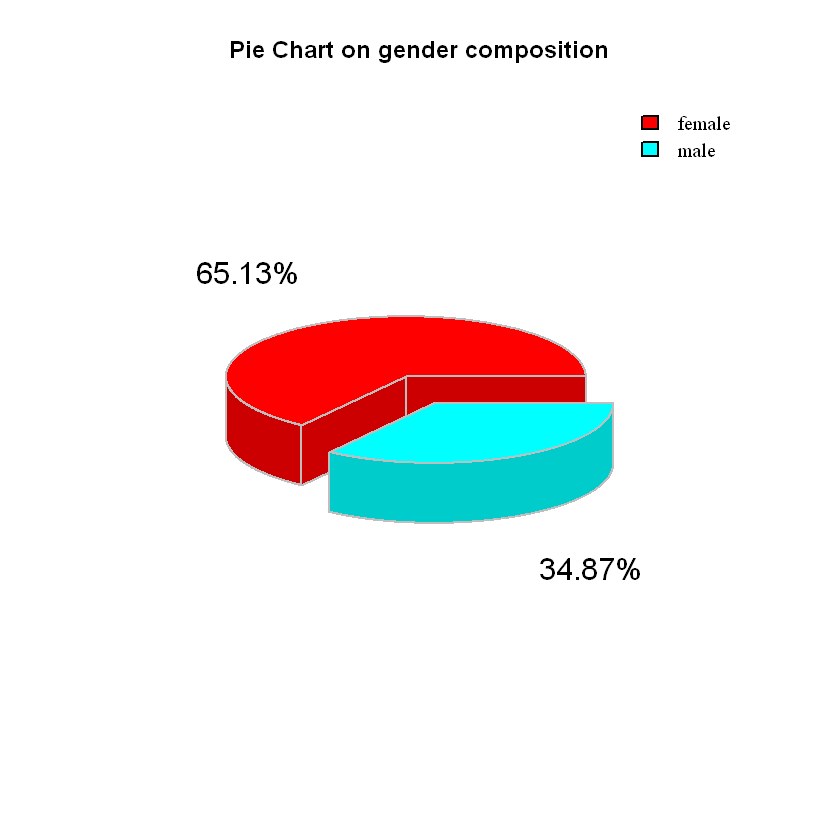

In [29]:
zz = round(z/(sum(z))*100,2)
par(lwd=2)

pie3D(z,explode = 0.1,labels = paste0(zz,"%"),radius=0.6,lwd=0.9,edges = 900,border ="gray",
      main='Pie Chart on gender composition')
legend("topright",fill=rainbow(2),legend = c("female","male"),text.font=6,bty="n",)

In [32]:
#there were more females than males in the dataset, now ,we want to see if there are more females who have the CardioV disease.
F_disease = nrow(cardio_frame[cardio_frame[,3] == 1 & cardio_frame[,13] == 1,])
M_disease = nrow(cardio_frame[cardio_frame[,3] == 2 & cardio_frame[,13] == 1,])
F_disease
M_disease

[1] 22115

[1] 12031

In [33]:
#we see that there is indeed more females who have the cardioV. disease but it is misleading because there are more females, so
#we will find the percentage composition of males and females who have the disease relative to their respective totals.

female_total = nrow(cardio_frame[cardio_frame$gender == 1,])
male_total = nrow(cardio_frame[cardio_frame$gender == 2,])
female_total
male_total

[1] 44938

[1] 24061

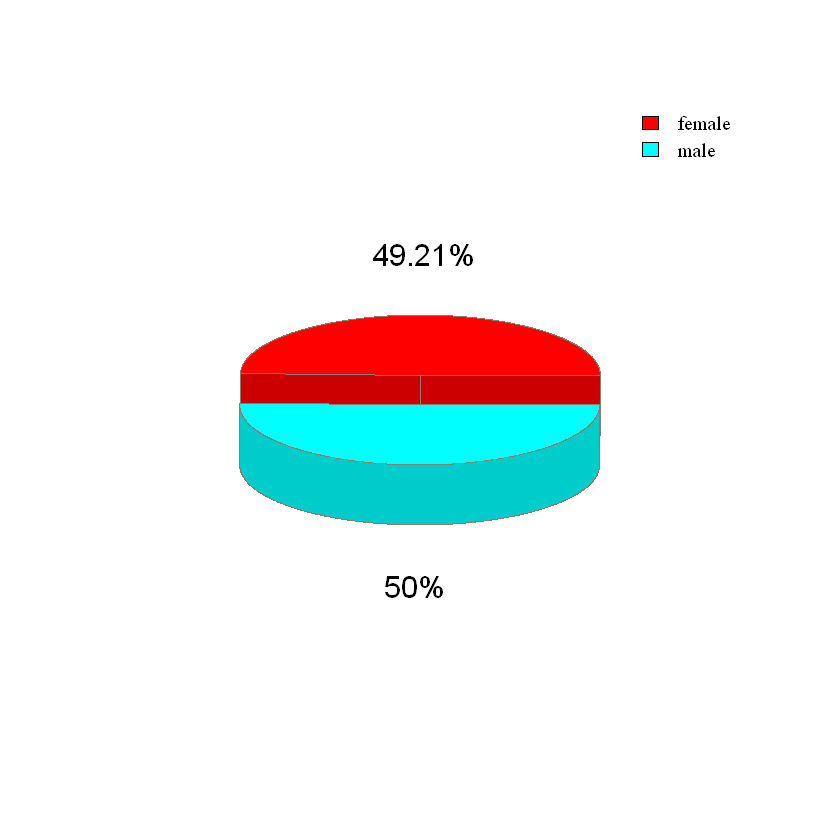

In [34]:
m = c(round((F_disease/female_total)*100,2),round((M_disease/male_total)*100,2))


pie3D(m,explode = 0.1,labels = paste0(m,"%"),radius=0.6,lwd=0.9,edges = 900,border ="bisque4",las=1)
legend("topright",fill=rainbow(2),legend = c("female","male"),text.font=6,bty="n")

#we see that relative to each gender total there is not a significant difference in the amount of males or females,
#who have the cardio vascular disease.

In [35]:
#we will now compare the weights of the patients who have the cardio vascular disease and those who do not.
#here we will make use of boxplots. We will get the weights of those who have the disease and those who do not.

disease_weight = cardio_frame[cardio_frame[,13] == 1,5]
Ndisease_weight = cardio_frame[cardio_frame[,13] == 0,5]



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   66.00   75.00   76.72   85.00  200.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.00   63.00   70.00   71.57   79.00  200.00 

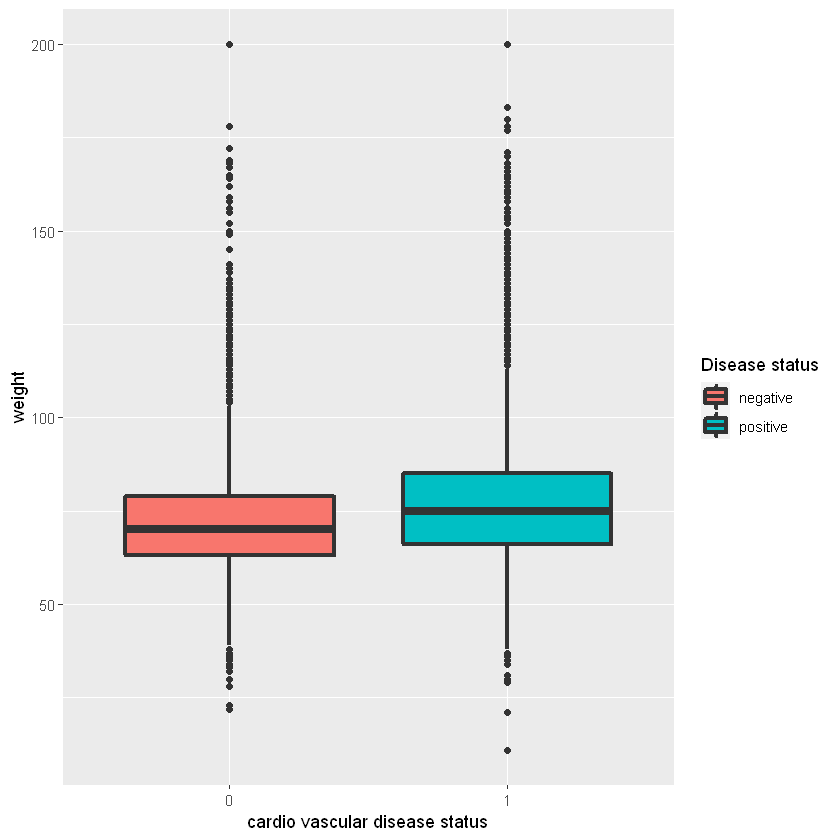

In [36]:
cardio_frame$cardioV_disease = as.factor(cardio_frame$cardioV_disease)

ggplot(cardio_frame,aes(x = cardioV_disease,y = weight,group=cardioV_disease,fill = cardioV_disease))+
 geom_boxplot(size=1.2)+
  xlab("cardio vascular disease status")+
   scale_fill_discrete(name = "Disease status", labels = c("negative","positive"))

summary(disease_weight)
summary(Ndisease_weight)

In [ ]:
#the average weight of patients who have the disease is higher than the average weight of patients who do not have the disease.
#but we also see that some of the patients with the least weight also have the disease.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.00   50.00   55.00   54.47   60.00   64.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   46.00   52.00   51.22   57.00   64.00 

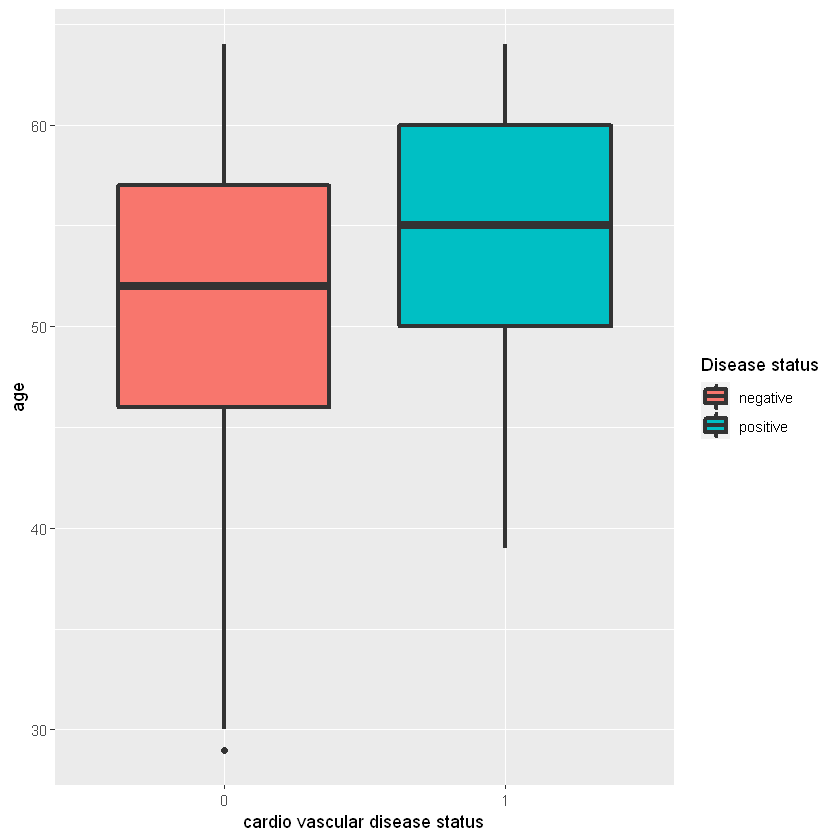

In [37]:
#we will do the same with age.
cardio_frame$cardioV_disease = as.factor(cardio_frame$cardioV_disease)

ggplot(cardio_frame,aes(x = cardioV_disease,y = age,group=cardioV_disease,fill = cardioV_disease))+
 geom_boxplot(size=1.2)+
  xlab("cardio vascular disease status")+
    scale_fill_discrete(name = "Disease status", labels = c("negative","positive"))


summary(cardio_frame$age[cardio_frame$cardioV_disease == 1])
summary(cardio_frame$age[cardio_frame$cardioV_disease == 0])

In [52]:
#we can see that the average age of patients with the disease is higher than the average age of patients who dont have it.
#We also see the that younger patients tend to not have the disease.


In [ ]:
#Now ill look at the cholesterol at level 3(well above normal) based on age groups.

In [38]:
p11 = cardio_frame[cardio_frame$age >= 30 & cardio_frame$age <=39,]
p22 = cardio_frame[cardio_frame$age >= 40 & cardio_frame$age <=49,]
p33 = cardio_frame[cardio_frame$age >= 50 & cardio_frame$age <=59,]
p44 = cardio_frame[cardio_frame$age >= 60 & cardio_frame$age <=69,]

In [39]:
p1 = cardio_frame[cardio_frame$age >= 30 & cardio_frame$age <=39 & cardio_frame$cholesterol==3,]
p2 = cardio_frame[cardio_frame$age >= 40 & cardio_frame$age <=49 & cardio_frame$cholesterol==3,]
p3 = cardio_frame[cardio_frame$age >= 50 & cardio_frame$age <=59 & cardio_frame$cholesterol==3,]
p4 = cardio_frame[cardio_frame$age >= 60 & cardio_frame$age <=69 & cardio_frame$cholesterol==3,]

In [40]:
cholframe = data.frame(Age_group=c("30-39","40-49","50-59","60-69"),high_cholesterol_patients=c(nrow(p1),nrow(p2),
        nrow(p3),nrow(p4)),Total_Patient_count=c(nrow(p11),nrow(p22),nrow(p33),nrow(p44)),
                            percent_composition=100*c(nrow(p1)/nrow(p11),nrow(p2)/nrow(p22),nrow(p3)/nrow(p33),
                                                    nrow(p4)/nrow(p44)))
cholframe

Age_group,high_cholesterol_patients,Total_Patient_count,percent_composition
30-39,60,1765,3.399433
40-49,1154,19390,5.951521
50-59,4327,35003,12.361798
60-69,2360,12838,18.382926


In [ ]:
#Now ill look at the glucose at level 3(well above normal) based on age groups.

In [41]:
g1 = cardio_frame[cardio_frame$age >= 30 & cardio_frame$age <=39,]
g2 = cardio_frame[cardio_frame$age >= 40 & cardio_frame$age <=49,]
g3 = cardio_frame[cardio_frame$age >= 50 & cardio_frame$age <=59,]
g4 = cardio_frame[cardio_frame$age >= 60 & cardio_frame$age <=69,]

In [42]:
g11 = cardio_frame[cardio_frame$age >= 30 & cardio_frame$age <=39 & cardio_frame$glucose==3,]
g22 = cardio_frame[cardio_frame$age >= 40 & cardio_frame$age <=49 & cardio_frame$glucose==3,]
g33 = cardio_frame[cardio_frame$age >= 50 & cardio_frame$age <=59 & cardio_frame$glucose==3,]
g44 = cardio_frame[cardio_frame$age >= 60 & cardio_frame$age <=69 & cardio_frame$glucose==3,]

In [43]:
gluframe = data.frame(Age_group=c("30-39","40-49","50-59","60-69"),high_glucose_patients=c(nrow(g11),nrow(g22),
        nrow(g33),nrow(g44)),Total_Patient_count=c(nrow(g1),nrow(g2),nrow(g3),nrow(g4)),
                            percent_composition=100*c(nrow(g11)/nrow(g1),nrow(g22)/nrow(g2),nrow(g33)/nrow(g3),
                                                    nrow(g44)/nrow(g4)))
gluframe

Age_group,high_glucose_patients,Total_Patient_count,percent_composition
30-39,59,1765,3.342776
40-49,874,19390,4.507478
50-59,2948,35003,8.422135
60-69,1367,12838,10.648076


In [ ]:
#we see that older patients tend to have a well above normal(high) level of cholesterol and glucose.

In [ ]:
#now ill look at patients who have bad health, that is patients who smoke,are not active,consume alcohol,
#and have above and well above normal levels of glucose and cholesterol.

In [44]:
one_frame = cardio_frame[!cardio_frame$cholesterol==1 & !cardio_frame$glucose==1 &
                           cardio_frame$alcohol==1 & 
                        cardio_frame$smoke==1 & cardio_frame$active==0,]
one_frame

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardioV_disease
373,525,41,2,172,71,160,120,3,3,1,1,0,1
4117,5827,51,2,172,70,120,75,3,2,1,1,0,1
5642,8009,50,2,164,58,120,80,3,3,1,1,0,0
7486,10673,57,2,161,77,150,100,2,2,1,1,0,1
9608,13696,53,1,184,134,140,90,2,2,1,1,0,1
14904,21311,51,2,178,115,200,130,3,3,1,1,0,1
15165,21682,55,1,161,97,120,80,2,2,1,1,0,0
16684,23831,49,2,171,74,130,90,2,2,1,1,0,1
17050,24362,50,2,166,70,120,80,2,2,1,1,0,0
18402,26273,44,2,173,95,150,100,2,2,1,1,0,1


In [45]:
#looking at the gender composition.
nrow(one_frame)
table(one_frame$gender)

[1] 34


 1  2 
 6 28 

In [ ]:
#we see that out of the 34 patient with bad health ,28 happen to be males.Males are more than 4 times as likely,
#to have bad health than females.Interesting!

In [ ]:
#now, ill do the same but with patients who have the best health.

In [46]:
zero_frame = cardio_frame[cardio_frame$cholesterol==1 & cardio_frame$glucose==1 & cardio_frame$alcohol==0 & 
                        cardio_frame$smoke==0 & cardio_frame$active==1,]
zero_frame
nrow(zero_frame)

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardioV_disease
1,0,50,2,168,62,110,80,1,1,0,0,1,0
4,3,48,2,169,82,150,100,1,1,0,0,1,1
9,13,48,1,158,71,110,70,1,1,0,0,1,0
11,15,61,1,169,80,120,80,1,1,0,0,1,0
12,16,51,2,173,60,120,80,1,1,0,0,1,0
14,21,54,1,158,78,110,70,1,1,0,0,1,0
21,30,54,2,163,83,120,80,1,1,0,0,1,0
22,31,58,1,157,69,130,80,1,1,0,0,1,0
24,33,64,2,156,45,110,60,1,1,0,0,1,0
27,37,53,1,156,59,130,90,1,1,0,0,1,0


[1] 34322

In [47]:
# from 34,322 patients who have the best health, 23,967 happen to be female.Females are twice as likely to have the best,
#health than males
table(zero_frame$gender)


    1     2 
23967 10355 

In [ ]:
# Now we will model whether a person has he disease or not using the two blood pressure types.
#divide the data into two data frames for cross validation

In [56]:
cardio_frame1 = cardio_frame[1:(nrow(cardio_frame)/2),]


In [57]:
loggy = glm(cardioV_disease ~ systolic_bp + diastolic_bp,family = binomial(link = "logit"),data = cardio_frame1)
loggy


Call:  glm(formula = cardioV_disease ~ systolic_bp + diastolic_bp, family = binomial(link = "logit"), 
    data = cardio_frame1)

Coefficients:
 (Intercept)   systolic_bp  diastolic_bp  
    -8.77220       0.05276       0.02596  

Degrees of Freedom: 34498 Total (i.e. Null);  34496 Residual
Null Deviance:	    47820 
Residual Deviance: 41020 	AIC: 41030

In [ ]:
#We use the summary() function to get more information on the model. This will let us know if the variables(blood pressures),
#are significant or not in predicting if a patient has the cardio vascular disease.We will use hypothesis testing for this.

In [58]:
summary(loggy)


Call:
glm(formula = cardioV_disease ~ systolic_bp + diastolic_bp, family = binomial(link = "logit"), 
    data = cardio_frame1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4508  -1.0275  -0.4038   1.0035   3.9163  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -8.772201   0.131412  -66.75   <2e-16 ***
systolic_bp   0.052764   0.001137   46.40   <2e-16 ***
diastolic_bp  0.025964   0.001787   14.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47820  on 34498  degrees of freedom
Residual deviance: 41023  on 34496  degrees of freedom
AIC: 41029

Number of Fisher Scoring iterations: 4


In [ ]:
#(1)### HO : B1 = 0 vs. HA : B1 =! 0
#(2)### HO : B2 = 0 vs. HA : B2 =! 0
#Reject HO, if P-values < alpha
# p-value(2e-16) < alpha = 0.05,0,01 and 0.1 for both B1 and B2
#We ,therefore, reject the null hypotheisi(HO) and conclude that both variables are significant in the model.

In [ ]:
#we can now make predictions using the fitted values but we will need a cut-off value that will decide the prediction value.
#We will use a Receiver Operating Characterisitc(ROC) curve.

In [59]:
install.packages("ROCR")

also installing the dependencies 'bitops', 'gtools', 'caTools', 'gplots'




  There is a binary version available but the source version is later:
       binary source needs_compilation
gtools  3.8.2  3.9.2              TRUE

  Binaries will be installed
package 'bitops' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sanele Sibeko\AppData\Local\Temp\Rtmp2xAudH\downloaded_packages


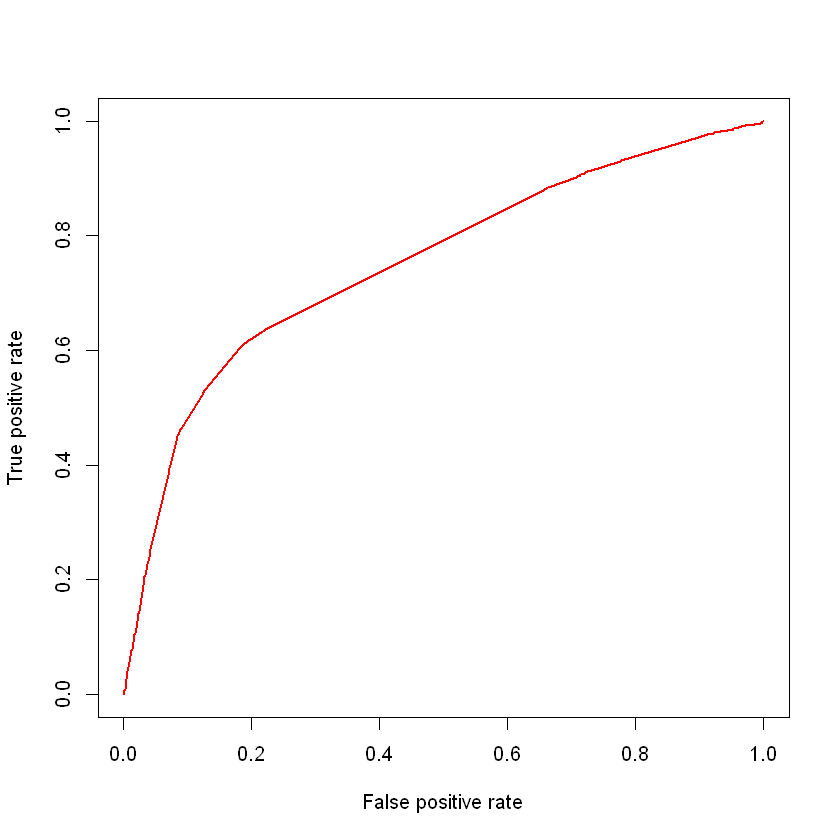

In [65]:
library(ROCR)
y = cardio_frame1$cardioV_disease
probs = loggy$fitted.values

pred = prediction(probs,y)
perf = performance(pred,"tpr","fpr")
plot(perf,col = "red",lwd=2)

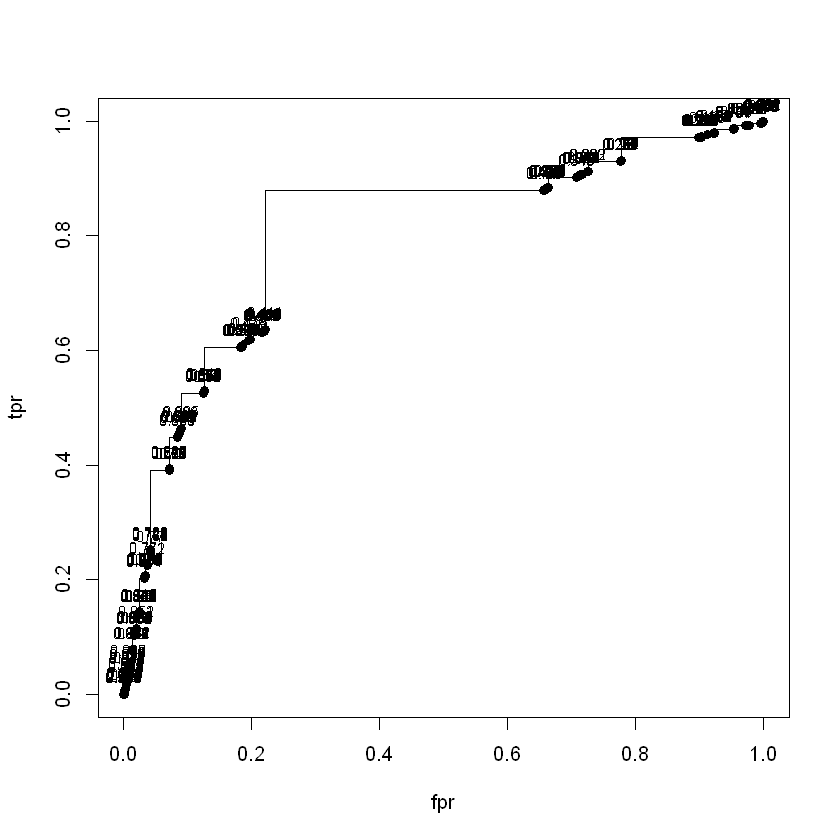

In [71]:
tpr = perf@"y.values"[[1]]
fpr = perf@"x.values"[[1]]
cutoff = pred@"cutoffs"[[1]]

plot(fpr,tpr,type="S")
points(fpr,tpr,pch=16)
text(fpr,tpr,round(cutoff,3),pos=3,cex=0.75)

In [ ]:
#the point closest to the top left is the best cutt-off point,therefore, we will calculate the distance between the top left,
#(0,1)and each point on the curve.we use the distance formula and find the shortest distance,meaning its the closest point.

In [74]:
distance = sqrt((0-fpr)^2 + (1-tpr)^2)
distance
index_cut = which(distance == min(distance))
index_cut
co = cutoff[index_cut]
co


[1] 1.0000000 0.9999413 0.9998825 0.9998238 0.9997651 0.9997064 0.9996476
  [8] 0.9995889 0.9994715 0.9992953 0.9992953 0.9992366 0.9992366 0.9991191
 [15] 0.9990604 0.9989429 0.9987668 0.9986493 0.9981795 0.9981208 0.9976510
 [22] 0.9975923 0.9975923 0.9968290 0.9965941 0.9965354 0.9964767 0.9962418
 [29] 0.9955370 0.9954783 0.9953609 0.9953021 0.9952434 0.9951847 0.9941865
 [36] 0.9932473 0.9931886 0.9931298 0.9931299 0.9930125 0.9924841 0.9907230
 [43] 0.9907231 0.9906643 0.9906056 0.9906057 0.9906059 0.9906060 0.9903123
 [50] 0.9903125 0.9816841 0.9816253 0.9815666 0.9808032 0.9807444 0.9806857
 [57] 0.9806270 0.9805683 0.9805095 0.9804508 0.9766343 0.9765755 0.9765758
 [64] 0.9750496 0.9749909 0.9749321 0.9749324 0.9748736 0.9748149 0.9747562
 [71] 0.9747564 0.9746977 0.9746390 0.9745805 0.9745218 0.9744043 0.9743456
 [78] 0.9741107 0.9734060 0.9659528 0.9659531 0.9646027 0.9645440 0.9644853
 [85] 0.9644856 0.9643682 0.9643094 0.9643098 0.9642510 0.9641923 0.9641336
 [92] 0.9640165 0.9640168 0.9593212 0.9588517 0.9558601 0.9558014 0.9557427
 [99] 0.9557431 0.9556843 0.9556847 0.9556260 0.9555673 0.9555677 0.9554502
[106] 0.9552741 0.9552745 0.9552749 0.9552753 0.9552757 0.9534582 0.9533995
[113] 0.9531651 0.9238531 0.9237356 0.9234420 0.9234428 0.9233840 0.9233253
[120] 0.9232666 0.9232079 0.9231492 0.9230904 0.9230317 0.9226794 0.9226801
[127] 0.9226214 0.9226222 0.9225635 0.9225642 0.9225055 0.9223881 0.9221547
[134] 0.9220960 0.9220381 0.8973859 0.8970336 0.8957440 0.8956853 0.8955689
[141] 0.8955102 0.8955113 0.8953939 0.8953950 0.8953362 0.8952775 0.8952786
[148] 0.8952199 0.8952210 0.8951623 0.8951634 0.8951645 0.8951058 0.8950471
[155] 0.8949307 0.8948720 0.8948133 0.8947546 0.8946372 0.8945784 0.8945197
[162] 0.8945208 0.8944621 0.8944633 0.8944045 0.8943458 0.8942284 0.8941697
[169] 0.8941110 0.8853882 0.8849784 0.8589034 0.8587860 0.8587875 0.8587288
[176] 0.8586717 0.8586146 0.8585559 0.8584971 0.8584384 0.8583813 0.8583829
[183] 0.8583242 0.8582655 0.8582083 0.8580909 0.8580322 0.8574500 0.8573325
[190] 0.8572738 0.8572151 0.8572167 0.8571580 0.8570993 0.8570406 0.8569819
[197] 0.8569232 0.8568645 0.8568058 0.8567471 0.8566297 0.8549908 0.8547560
[204] 0.8546973 0.7973439 0.7973462 0.7966467 0.7958839 0.7958863 0.7950718
[211] 0.7950742 0.7950179 0.7950203 0.7948442 0.7947879 0.7947903 0.7947316
[218] 0.7946729 0.7946753 0.7946167 0.7945580 0.7944993 0.7943843 0.7943257
[225] 0.7940323 0.7939760 0.7939784 0.7932180 0.7931007 0.7930420 0.7930444
[232] 0.7930468 0.7929881 0.7929905 0.7929930 0.7929343 0.7928756 0.7928169
[239] 0.7927583 0.7926996 0.7926409 0.7925822 0.7923524 0.7922937 0.7757414
[246] 0.7732540 0.7540940 0.7539767 0.7539798 0.7538625 0.7538039 0.7537452
[253] 0.7536866 0.7536279 0.7535724 0.7535138 0.7534551 0.7533965 0.7533441
[260] 0.7533472 0.7532885 0.7532299 0.7532330 0.7531744 0.7528350 0.7519063
[267] 0.7518476 0.7517890 0.7517304 0.7516131 0.7515544 0.7514958 0.7514372
[274] 0.7513785 0.7513199 0.7513231 0.7510885 0.7510330 0.7509744 0.7509158
[281] 0.7489380 0.7477686 0.6135327 0.6134744 0.6133059 0.6133125 0.6132542
[288] 0.6131958 0.6126191 0.6125608 0.6124441 0.6123857 0.6123274 0.6122757
[295] 0.6122823 0.6122240 0.6114922 0.6114989 0.6113305 0.6112722 0.6112139
[302] 0.6111555 0.6110972 0.6111039 0.6110456 0.6109872 0.6109356 0.6108773
[309] 0.6108189 0.6108256 0.6107090 0.6107156 0.6106640 0.6104643 0.6104060
[316] 0.6102310 0.5578226 0.5578311 0.5577816 0.5563347 0.5522372 0.5520319
[323] 0.5519739 0.5518579 0.5518088 0.5517508 0.5516928 0.5517017 0.5517107
[330] 0.5516527 0.5515367 0.5514786 0.5514206 0.5513626 0.5513136 0.5512556
[337] 0.5512735 0.5511665 0.5507566 0.5507656 0.5505517 0.5504937 0.5504357
[344] 0.5503777 0.5503197 0.5503288 0.5502708 0.5502889 0.5502980 0.5503071
[351] 0.5502491 0.5501911 0.5501422 0.5455986 0.5437133 0.4901839 0.4901983
[358] 0.4901415 0.4900847 0.4901136 0.4897327 0.4897472 0.4896336 0.4895768
[365] 0.4896059 0.4895491 0.4894355 0.4893788 0.48

[1] 465

32809 
0.4121573

In [99]:
#if probs is larger or equal to co=0.412, we predict that a patient has the disease, then predy_co will be 1, else be 0.
predy_co = as.numeric(probs >= co)
#predy_co

In [100]:
#we create a confusion matrix using y and predy_co(observed values vs predicted values).
table_pred = table(y,predy_co)
table_pred

   predy_co
y       0     1
  0 13624  3847
  1  6205 10823

In [101]:
#now we find the prediction rates to assess accuracy
table_pred_rate = table_pred/apply(table_pred,1,sum)
table_pred_rate

   predy_co
y           0         1
  0 0.7798065 0.2201935
  1 0.3643998 0.6356002

In [ ]:
#We see that 78% of those who dont have the disease were predicted correctly(that they would not have the disease)
#We see that 63% of those who do have the disease were predicted correctly(that they would have the disease)

In [85]:
#Now we will look at the overall correctly prediction rate and incorrectly prediction rate.
concordant = round(((table_pred[1,1]+table_pred[2,2])/length(y))*100,3)
concordant

discordant = 100 - concordant
discordant

[1] 70.863

[1] 29.137

In [88]:
#Somers Delta(determines strength and direction between,
#pairs of variables). The closer to  1the better the model is.

somers_d = (concordant-discordant)/100
somers_d

[1] 0.41726

In [ ]:
#Since this value is not close to 1, 
#this indicates that there is a fairly weak positive relationship between the two variables.

In [102]:
#AUC represents the degree of separability. It tells how much the model is capable of distinguishing between classes. 
#The Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 
c <- performance(pred, measure = "auc")
Auc <- c@y.values[[1]]
Auc

[1] 0.7519722

In [ ]:
#Our model is fairly accurate at predictions.

In [ ]:
# I will now perform hypotheisis testing.These tests tend to always reject the null hypotheisis for large datasets,
#so we will perform these tests on a subset of the data.

In [114]:
cardio_dframe = cardio_frame[1:500,]
cardio_dframe

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardioV_disease
1,0,50,2,168,62,110,80,1,1,0,0,1,0
2,1,55,1,156,85,140,90,3,1,0,0,1,1
3,2,51,1,165,64,130,70,3,1,0,0,0,1
4,3,48,2,169,82,150,100,1,1,0,0,1,1
5,4,47,1,156,56,100,60,1,1,0,0,0,0
6,8,60,1,151,67,120,80,2,2,0,0,0,0
7,9,60,1,157,93,130,80,3,1,0,0,1,0
8,12,61,2,178,95,130,90,3,3,0,0,1,1
9,13,48,1,158,71,110,70,1,1,0,0,1,0
10,14,54,1,164,68,110,60,1,1,0,0,0,0


In [ ]:
#we will test if having the cardio vascular disease is dependent on the glucose and cholesterol levels.

In [115]:
cholesterol = table(cardio_dframe$cholesterol,cardio_dframe$cardioV_disease)
cholesterol

   
      0   1
  1 203 164
  2  33  39
  3   5  56

In [ ]:
#HO : cardio vascular disease and cholesterol level are independent 
# VS.
#HA : cardio vascular disease and cholesterol level are dependent
#reject HO, if p-values < alpha @ 0.05,0.01 and 0.1

In [117]:
chisq.test(cholesterol)


	Pearson's Chi-squared test

data:  cholesterol
X-squared = 46.696, df = 2, p-value = 7.245e-11


In [ ]:
#p=7.245e-11, therefore, we reject HO at all alpha levels.cardio vascular disease and cholesterol are dependent

In [116]:
glucose = table(cardio_dframe$glucose,cardio_dframe$cardioV_disease)
glucose

   
      0   1
  1 215 210
  2  16  20
  3  10  29

In [ ]:
#HO : cardio vascular disease and glucose level are independent. 
# VS.
#HA : cardio vascular disease and glucose level are dependent.
#reject HO, if p-values < alpha @ 0.05,0.01 and 0.1

In [118]:
chisq.test(glucose)


	Pearson's Chi-squared test

data:  glucose
X-squared = 9.1235, df = 2, p-value = 0.01044


In [ ]:
#p=0.01044,therefore, we reject HO for alpha = 0.05 and 0.1, then cardio vascular disease and glucose are dependent.
#for alpha = 0.01, we do not reject HO.

In [ ]:
#our analysis at the beginning showed us signs that females may be healtheir than males, so now we will compare the means of,
#2 independent population using the t.test.

#We will compare the systolic blood pressure means for both genders

In [122]:
#First we separate and centre the two data sets.
sysM = c(cardio_dframe[cardio_dframe$gender == 2,6])
sysF = c(cardio_dframe[cardio_dframe$gender == 1,6])

In [128]:
sysMC = (sysM - mean(sysM))/(sd(sysM))
sysFC = (sysF - mean(sysF))/(sd(sysF))
sysAll = c(sysMC,sysFC)

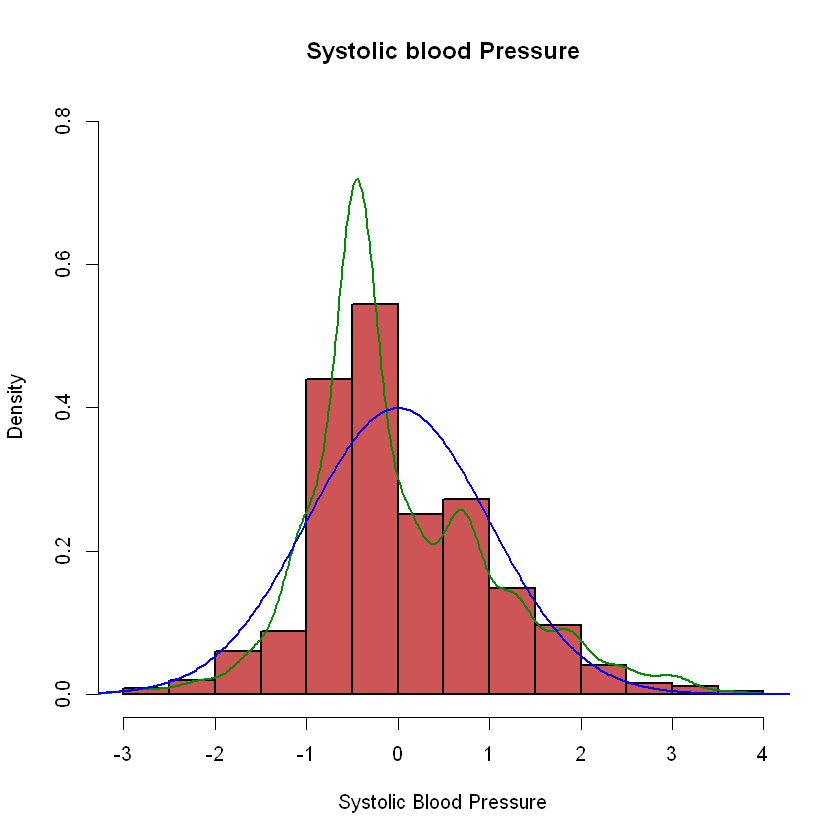

In [139]:
#We then test the assumption of normality.
par(lwd=2)
hist(sysAll,col = "indianred3",main = "Systolic blood Pressure",xlab = "Systolic Blood Pressure",freq=FALSE,ylim=c(0,0.8))
lines(density(sysAll),col = "green4")
x.grid = seq(-10,10,length=1000)
lines(x.grid,dnorm(x.grid,mean(sysAll),sd(sysAll)),col="blue",lwd=2)

In [ ]:
#the histogram is skewed to the right.systolic blood pressure is not normmaly distributed.
#Lets confirm this by performing a formal test.

In [140]:
#HO : systolic blood pressure is normal VS. HA : systolic blood pressure is not normal
#reject HO if p-values < alpha @ 0.05
shapiro.test(sysAll)


	Shapiro-Wilk normality test

data:  sysAll
W = 0.92449, p-value = 3.746e-15


In [ ]:
#p=3.746e-15, therefore, we reject HO.systolic blood pessure is not normal.
#We will therefore, make use of non-parametric tests,instead of t.tests, 
#to test if the mean systolic blood pressure of females is less,than that of males.

In [142]:
#HO : uF = uM VS. HA : uF < uM
#Reject HO if p-values < alpha @ 0.05,0.01 and 0.1
wilcox.test(sysF,sysM,alternative="less")


	Wilcoxon rank sum test with continuity correction

data:  sysF and sysM
W = 27122, p-value = 0.131
alternative hypothesis: true location shift is less than 0


In [ ]:
#p=0.131, therefore, we do not reject HO at all alpha levels.
#The mean systolic blood pressure of females and males are not significantly different.

In [ ]:
#we do the same for weight.(that is test if the mean weight of females is less than that of males)

In [143]:
#we separate and standardise the data
wF = cardio_dframe[cardio_dframe$gender == 1,5]
wM = cardio_dframe[cardio_dframe$gender == 2,5]

In [145]:
wFC = c((wF - mean(wF))/sd(wF))
wMC = c((wM - mean(wM))/sd(wM))
wAll = c(wFC,wMC)


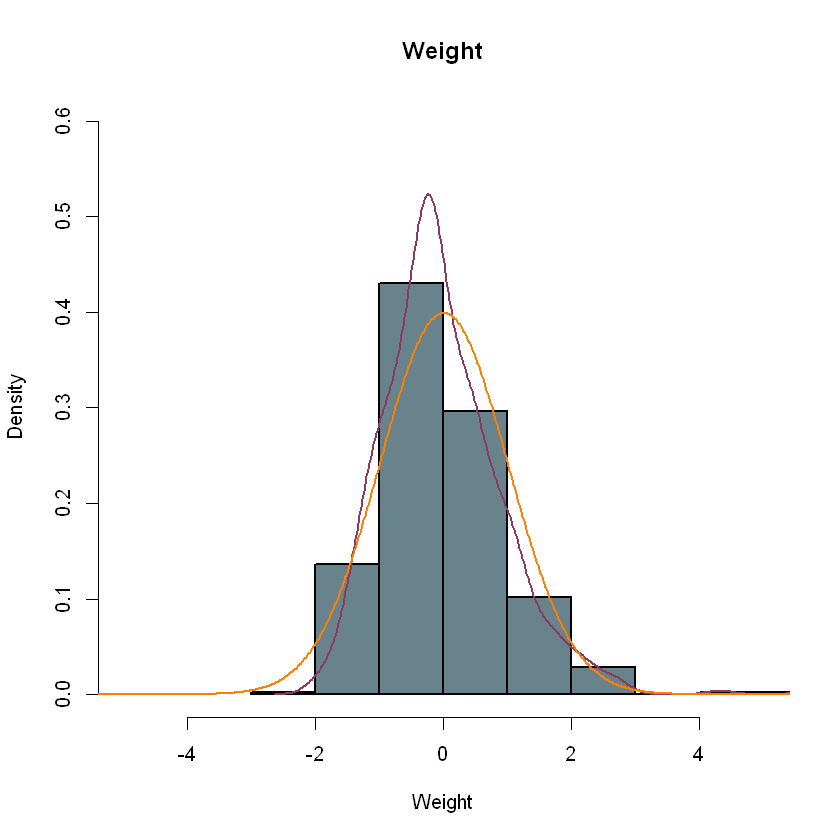

In [149]:
#we will now graphically test the assumption of normality.
#We then test the assumption of normality.
par(lwd=2)
hist(wAll,col = "lightblue4",main = "Weight",xlab = "Weight",freq=FALSE,ylim=c(0,0.6),xlim=c(-5,5))
lines(density(wAll),col = "hotpink4")
x.grid = seq(-10,10,length=1000)
lines(x.grid,dnorm(x.grid,mean(wAll),sd(wAll)),col="darkorange1",lwd=2)

In [ ]:
#the histogram is skewed to the right.The weight readings are not normally distributed.
#We will now conduct a formal test to confirm this.

In [150]:
#HO : weight readings are normal VS. HA : weight readings are not normal
#Reject HO if p-value < alpha @ 0.05

shapiro.test(wAll)


	Shapiro-Wilk normality test

data:  wAll
W = 0.90054, p-value < 2.2e-16


In [ ]:
#p=2.2e-16 < 0.05, therefore, we reject HO.Weight readings are indeed not normally distributed.
#We make us of non-parametric tests,instead of t.tests, to test whether the mean weight of females is less than that of males.

In [151]:
#HO : uF = uM VS. HA : uF < uM
#Reject HO if p-value < alpha @ 0.05

wilcox.test(wF,wM,alternative = "less")


	Wilcoxon rank sum test with continuity correction

data:  wF and wM
W = 22724, p-value = 4.432e-05
alternative hypothesis: true location shift is less than 0


In [ ]:
#p=4.432e-05 < alpha=0.05, therefore, we reject HO. the mean weight of females is less than that of males.

In [ ]:
#From the beginning i assumed that height was an insignificant variable in predicting, whether a patient has the diease,
#or not, so i will build a new model with height and see if it is significant or not.

In [154]:
logi = glm(cardioV_disease ~ height + age,family = binomial(link = "logit"),data = cardio_frame1)
logi


Call:  glm(formula = cardioV_disease ~ height + age, family = binomial(link = "logit"), 
    data = cardio_frame1)

Coefficients:
(Intercept)       height          age  
  -4.097966     0.001292     0.073026  

Degrees of Freedom: 34498 Total (i.e. Null);  34496 Residual
Null Deviance:	    47820 
Residual Deviance: 45830 	AIC: 45840

In [155]:
#Ho : B1(height) = 0 VS. HA : B1(height) =! 0
#reject HO if p-values < alpha @ 0.05,0.01,0.1
summary(logi)


Call:
glm(formula = cardioV_disease ~ height + age, family = binomial(link = "logit"), 
    data = cardio_frame1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5417  -1.1378  -0.7769   1.1188   1.6635  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.097966   0.246400 -16.631   <2e-16 ***
height       0.001292   0.001354   0.954     0.34    
age          0.073026   0.001694  43.103   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47820  on 34498  degrees of freedom
Residual deviance: 45833  on 34496  degrees of freedom
AIC: 45839

Number of Fisher Scoring iterations: 4


In [ ]:
#the p-value for height is 0.34 which is larger than alpha=0.05,0.01 and 0.1. We ,therefore, do not reject HO.
#Weight is not significantly different from 0. It is an insignificant predictor variable.